In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
import pathlib
from random import randint


import tensorflow_datasets as tfds

from tensorflow.keras import layers
import tensorflow.keras.layers as Layers

from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
from keras.utils.vis_utils import model_to_dot
from sklearn.metrics import confusion_matrix as CM
from random import randint

import matplotlib.gridspec as gridspec
from keras.preprocessing import image

import tensorflow.keras.utils as Utils
from sklearn.utils import shuffle
from IPython.display import SVG

In [ ]:
!wget --no-check-certificate \
    https://www.dropbox.com/sh/vy6ree7uwcgu8c8/AAAuEPRNzE-oM0Twe22brziXa?dl=0 \
    -O /tmp/5DeepProject20202021.zip

--2021-03-24 16:41:11--  https://www.dropbox.com/sh/vy6ree7uwcgu8c8/AAAuEPRNzE-oM0Twe22brziXa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/vy6ree7uwcgu8c8/AAAuEPRNzE-oM0Twe22brziXa [following]
--2021-03-24 16:41:11--  https://www.dropbox.com/sh/raw/vy6ree7uwcgu8c8/AAAuEPRNzE-oM0Twe22brziXa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb301fc79d75a065eac90635e09.dl.dropboxusercontent.com/zip_download_get/AusefUTuJqkeRO_PQkmRZycnRbQ6AeV9PYLplmYp1CYfcuVL6jYyOlRDj1tLFOnFrZ9gLQcfilnDVKhPjzULsr74IDGORrTdXxoEVxTJZ6s77w [following]
--2021-03-24 16:41:12--  https://ucb301fc79d75a065eac90635e09.dl.dropboxusercontent.com/zip_download_get/AusefUTuJqkeRO_PQkmRZycnRbQ6AeV9PYLplmYp1CYfcuVL6jYyOlRDj1tLFOnFrZ9gLQcfilnDVKhPj

In [ ]:
import zipfile
local_zip = '/tmp/5DeepProject20202021.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/5DeepProject20202021')
zip_ref.close()

In [ ]:
train_zip = '/tmp/5DeepProject20202021/train.zip'
zip_ref = zipfile.ZipFile(train_zip, 'r')
 
zip_ref.extractall('/tmp/5DeepProject20202021/train')
zip_ref.close()
 
test_zip = '/tmp/5DeepProject20202021/test.zip'
zip_ref = zipfile.ZipFile(test_zip, 'r')
zip_ref.extractall('/tmp/5DeepProject20202021/test')
zip_ref.close()
 
base_dir = '/tmp/5DeepProject20202021'
 
base_train_dir="/tmp/5DeepProject20202021/train"
base_test_dir="/tmp/5DeepProject20202021/test"
 
train_dir = os.path.join(base_train_dir, 'seg_train')
test_dir = os.path.join(base_test_dir, 'seg_test')
perd_dir = 'chemin vers les images'

In [ ]:
batch_size =32
img_height = 150
img_width = 150


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels = "inferred",
    label_mode = "categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 14034 files belonging to 6 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels = "inferred",
    label_mode = "categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
class_names = test_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
code = {'buildings' :0 , 'forest':1, 'glacier':2, 'mountain':3, 'sea':4,'street':5}

def getcode(n) :
  for x , y in code.items() :
    if n == y :
      return x

In [29]:
AUTOTUNE =tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
resize_and_rescala = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(img_height, img_width),
  layers.experimental.preprocessing.Rescaling(1./255)
])

In [31]:
data_augmentation = keras.Sequential(
    [
     keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                  input_shape=(img_height,
                                                               img_width,
                                                               3)),
     keras.layers.experimental.preprocessing.RandomRotation(0.1),
     keras.layers.experimental.preprocessing.RandomZoom(0.1),
     
    ]
)

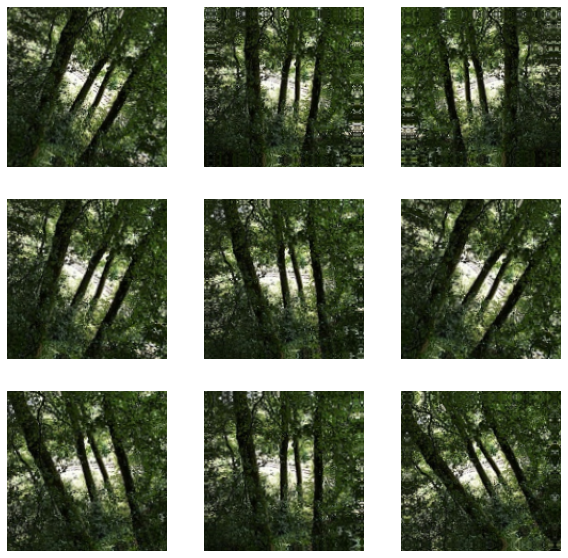

In [37]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [40]:
model = Sequential([
    data_augmentation,
   layers.experimental.preprocessing.Rescaling(1./255),
   layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 1)),
   layers.MaxPooling2D(2, 2),
   layers.Dropout(0.3),
   layers.Conv2D(64, (3,3), activation='relu'),
   layers.MaxPooling2D(2,2),
   layers.Conv2D(128, (3,3), activation='relu'),
   layers.MaxPooling2D(2,2),
   layers.Conv2D(128, (3,3), activation='relu'),
   layers.MaxPooling2D(2,2),
   layers.Flatten(),
   layers.Dense(512, activation='relu'),
   layers.Dense(6, activation='sigmoid')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)       

In [43]:
model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
                  

In [ ]:
epochs=1
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)


 19/439 [>.............................] - ETA: 10:59 - loss: 0.8982 - accuracy: 0.1466